# UBER
### Jocelyn Li


## Overview 

This UBER-Xchange Leasing dataset contains 999 car purchashing entries and 13 variables. Those records were randomly selected from Xchange’s executed lease contracts table.

## Variable Description
1. **Date**: the date that UBER purchased the car from the dealer 
2. **Weekly Payment**: The weekly payment that UBER driver pays to UBER. The weekly payments are automatically deducted from the driver’s Uber earnings. 
3. **New/Used**: new or used or reassignment car
4. **Dealer**: the dealer's name
5. **Make**: car maker 
6. **Model**: car model
7. **Year**: year 
8. **Invoiced Amount**: total cost 
9. **State**: which state the car was purchased and will be used 
10. **City**: which city the car was purchased and will be used
11. **City ID Name**: each city has a unique ID 
12. **Mileage @ Inception**: mileage 
13. **ZIP**: zipcode

## Objective
Analyze UBER Dataset and identify some key relationships and findings. 




In [94]:
# Import packages 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import zipcode
from datetime import date
%matplotlib inline  

In [95]:
#Load the UBER dataset 
df=pd.read_excel('XCL_Exercise_Data_Set_11.xlsx')

# 1. Summary of the Data Set

In [96]:
# preview the data
df.head()

,Date,Weekly Payment,New/Used,Dealer,Make,Model,Year,Invoiced Amount,State,City,City ID Name,Mileage @ Inception,ZIP
0,2015-08-06 00:00:00,115.21,NaN,JERRYS TOYOTA INC,Ford,Fusion,2013,15688.50,DC,8.0,Washington D.C.,0.0,20904
1,2015-08-14 19:38:00,146.12,NaN,Stevens Creek Toyota,Toyota,Corolla,2015,19849.76,CA,1.0,San Francisco,3.0,95050
2,2015-08-15 11:38:00,147.22,NaN,Toyota South Atlanta,Toyota,Corolla,2015,19991.93,GA,23.0,Atlanta,10.0,30046
3,2015-08-19 08:02:00,182.75,NaN,Grossinger Toyota North,Toyota,Camry,2015,22562.68,IL,7.0,Chicago,25.0,60649
4,2015-08-23 11:48:00,122.96,NaN,Community Honda,Nissan,Altima,2014,16632.59,CA,12.0,Los Angeles,38065.0,90037


#### Let's take a look at the summary of all the data. This dataset total 999 rows, 13 columns.
#### Immediately, we noticed there are missing values in New/Used, State, City, City ID Name, Mileage @ Inception and ZIP.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
Date                   999 non-null datetime64[ns]
Weekly Payment         999 non-null float64
New/Used               961 non-null object
Dealer                 999 non-null object
Make                   999 non-null object
Model                  999 non-null object
Year                   999 non-null int64
Invoiced Amount        999 non-null float64
State                  21 non-null object
City                   446 non-null float64
City ID Name           36 non-null object
Mileage @ Inception    980 non-null float64
ZIP                    184 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 101.5+ KB


# 2. Data Cleaning & Wrangling 
### 2.1 New/Used

In [98]:
# Defining New/Used for Null values
# if the Mileage @ Inception is less or equal than 30, then define the car as new, otherwise used.

for i in range (len(df)):
    if (pd.isnull(df['New/Used'][i])):
        if df['Mileage @ Inception'][i] <= 30:
            df['New/Used'][i]='New'
        else:
            df['New/Used'][i]='Used'
            
import warnings
warnings.filterwarnings('ignore')  

### 2.2  State

In [10]:
# I refill the state column by using python's zipcode package, and I can only get 106 states in total.

df_zip=df[pd.isnull(df['ZIP'])==False]
for i in range (len(df_zip)):
    try:
        myzip=zipcode.isequal(str(df_zip['ZIP'][i]))
        df_zip['State'][i]= myzip.state
        df_zip['City ID Name'][i]= myzip.city
        except: 
            pass
    

### 2.3 Payback Period

In [99]:
# To better analyze the payback period of each car, I added a new variable Payback_Period into the Dataset.
# I defined Payback_Period = cost / payment, I ignored some factors like depreciation, interest rate and etc.

df['Payback_Period']=df['Invoiced Amount']/df['Weekly Payment']


# 3. Variable Analysis 

### 3.1 Make & Model

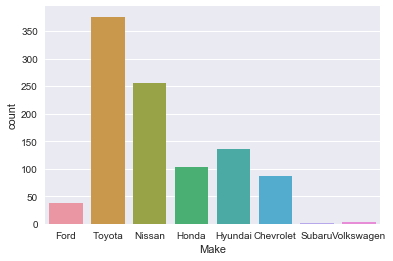

In [100]:
# Uber has purchased a significant percentage of the car rental fleet from Toyota and Nissan.

sns.countplot(x = 'Make', data = df)

In [101]:
#cross check make and model
pd.crosstab(df['Make'], df['Model']) 

Model,Accord,Altima,Camry,Civic,Corolla,Cruze,Edge,Elantra,Equinox,Escape,...,Outback,Prius,Prius C,RAV 4,Rogue,Sentra,Sonata,Venza,Versa,Yaris
Make,,,,,,,,,,,,,,,,,,,,,
Chevrolet,0,0,0,0,0,22,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
Ford,0,0,0,0,0,0,2,0,0,5,...,0,0,0,0,0,0,0,0,0,0
Honda,9,0,0,83,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hyundai,0,0,0,0,0,0,0,55,0,0,...,0,0,0,0,0,0,80,0,0,0
Nissan,1,131,0,0,0,0,0,0,0,0,...,0,0,0,0,5,91,0,0,17,0
Subaru,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Toyota,0,0,140,0,160,0,0,0,0,0,...,0,59,11,2,0,0,0,2,0,2
Volkswagen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
# There is 1 record uder Nissan and Accord, clearly, this is a wrong input, so drop this value. 

df=df.drop(df.loc[(df['Make']=='Nissan') & (df['Model']=='Accord' )].index)

In [103]:
# Let's see what types of cars that UBER is holding the most
# The top 4 models are: Corolla, Camry, Altima, Sentra

group_by_make_model = df.groupby(['Make', 'Model'])
group_by_make_model.size().sort_values(ascending = False)

Make        Model  
Toyota      Corolla    160
            Camry      140
Nissan      Altima     131
            Sentra      91
Honda       Civic       83
Hyundai     Sonata      80
Chevrolet   Malibu      59
Toyota      Prius       59
Hyundai     Elantra     55
Ford        Fusion      23
Chevrolet   Cruze       22
Nissan      Versa       17
Honda       Fit         12
Toyota      Prius C     11
Nissan      Maxima      10
Honda       Accord       9
Ford        Focus        8
Nissan      Rogue        5
Ford        Escape       5
Chevrolet   Equinox      5
Volkswagen  Jetta        4
Toyota      Yaris        2
            RAV 4        2
Ford        Edge         2
Toyota      Venza        2
Subaru      Outback      1
dtype: int64

### 3.2 New / Used

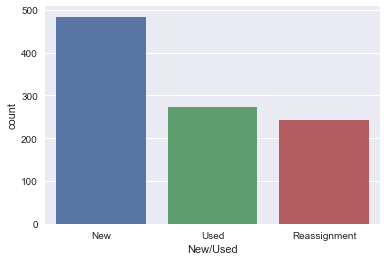

In [104]:
# Most cars are new. 
sns.countplot(x = 'New/Used', data = df)

#### Analyzed the car holdings based on useage.
#### Most new and used cars were purchased from Toyota.

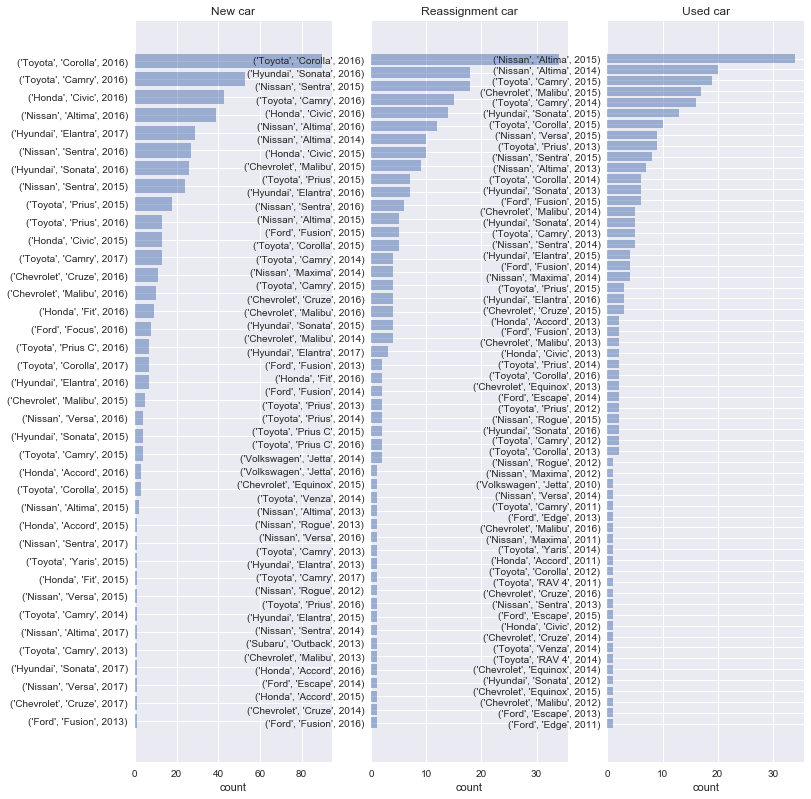

In [105]:
new_used=np.unique(df['New/Used'])
cost_count=['count']

fig = plt.figure(figsize=(12, 30))

pltid=1
for target in cost_count:
    xlabelname=target
       
    for sit in new_used:

        df_new=df[df['New/Used']==sit]

        Make_mean=df_new.groupby(['Make','Model','Year'], sort=False).agg(['mean', 'count'])

        Make_cost_count=Make_mean['Invoiced Amount']
        Make_cost_sort=Make_cost_count[target].sort_values()
        
        Make_cost_sort_df=pd.DataFrame(Make_cost_sort)


        y_pos = np.arange(len(Make_cost_sort_df))
        plt.subplot(2,3, pltid)
        plt.barh(y_pos, Make_cost_sort_df[target], align='center', alpha=0.5)
        plt.yticks(y_pos, Make_cost_sort_df.index)
        plt.xlabel(xlabelname)
        titlename=sit + ' car'
        plt.title(titlename)
        pltid+=1

In [106]:
# It's interesing that the payback period of reassignment is arond 1 week. 

New_average_return=df.groupby(['New/Used']).agg(['mean'])
New_average_return['Payback_Period']

,mean
New/Used,
New,116.578080
Reassignment,1.277311
Used,120.252050


#### The average payback period of reassignment is arond 1 week, the average payback period of new car is around 110 weeks (2 years). 

### 3.3 Payback Period and Fleet Size

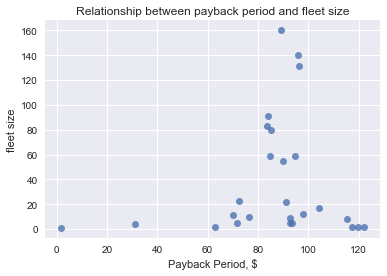

In [107]:
#relationship betwen payback period and car holding

model_mean=df.groupby(['Model'], sort=True).agg(['mean', 'count'])
model_payback_count=model_mean['Payback_Period']

sns.regplot(model_payback_count['mean'], model_payback_count['count'], fit_reg = False)
plt.title('Relationship between payback period and fleet size')
plt.xlabel('Payback Period, $')
plt.ylabel('fleet size')


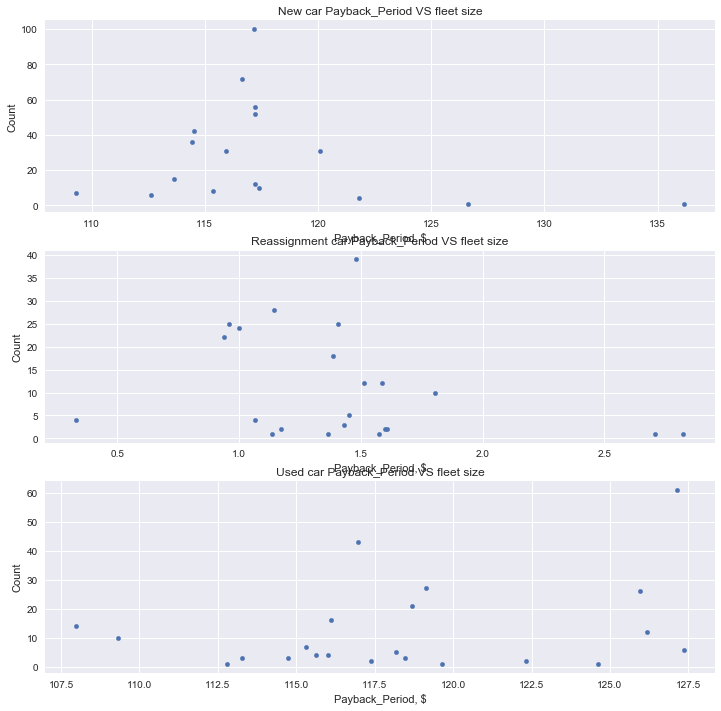

In [108]:
##relationship betwen payback period and fleet size based on useage


new_used=np.unique(df['New/Used'])
cost_count=['mean', 'count']

fig = plt.figure(figsize=(12, 12))
pltid=1

     
for car_con in new_used:
    df_new=df[df['New/Used']==car_con]
    Model_mean=df_new.groupby(['Model'], sort=False).agg(['mean', 'count'])
    Make_cost_count=Model_mean['Payback_Period']
    plt.subplot(3,1, pltid)
    plt.scatter(Make_cost_count['mean'], Make_cost_count['count'], s=20)
    
    plt.xlabel('Payback_Period, $')
    plt.ylabel('Count')
    titlename=car_con+' car Payback_Period VS fleet size'
    plt.title(titlename)
    pltid+=1  
       
plt.show()

### 3.4 Invoiced Amount and  Weekly Payment

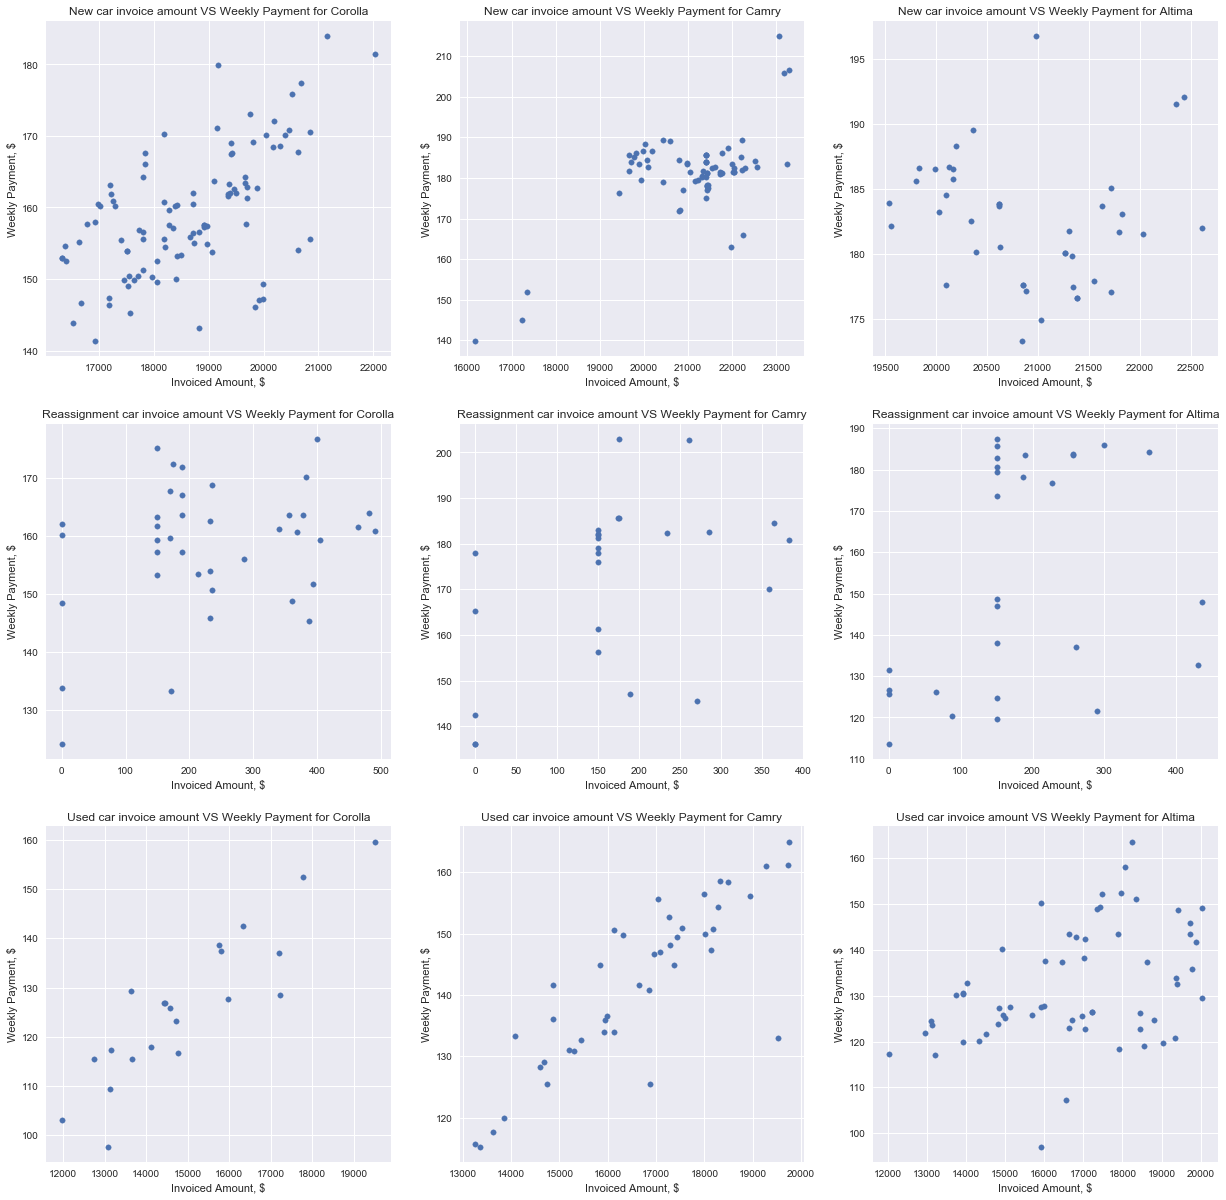

In [109]:
# I choose the model Corolla, Camry and Altima to analyze the relationship between Invoiced Amount and Weekly Payment based on new/used/reassignment.

model_example=['Corolla','Camry','Altima']
new_used=np.unique(df['New/Used'])

fig = plt.figure(figsize=(21, 21))
pltid=1

for car_con in new_used:
    df_con=df[df['New/Used']==car_con]
    for model in model_example:  
        df_model_example=df_con[df_con['Model']==model]  
        plt.subplot(3,3, pltid)
        plt.scatter(df_model_example['Invoiced Amount'],df_model_example['Weekly Payment'],  s=30)
        plt.xlabel('Invoiced Amount, $')
        plt.ylabel('Weekly Payment, $')
        titlename=car_con +' car invoice amount VS Weekly Payment for ' + model
        plt.title(titlename)
        pltid+=1
plt.show()

#### From the plot we can,  see there are some positive relationship between invoiced amount and weekly payment for new Corolla, used Corolla and used Camry. 

### 3.5 Mileage and Weekly Payment

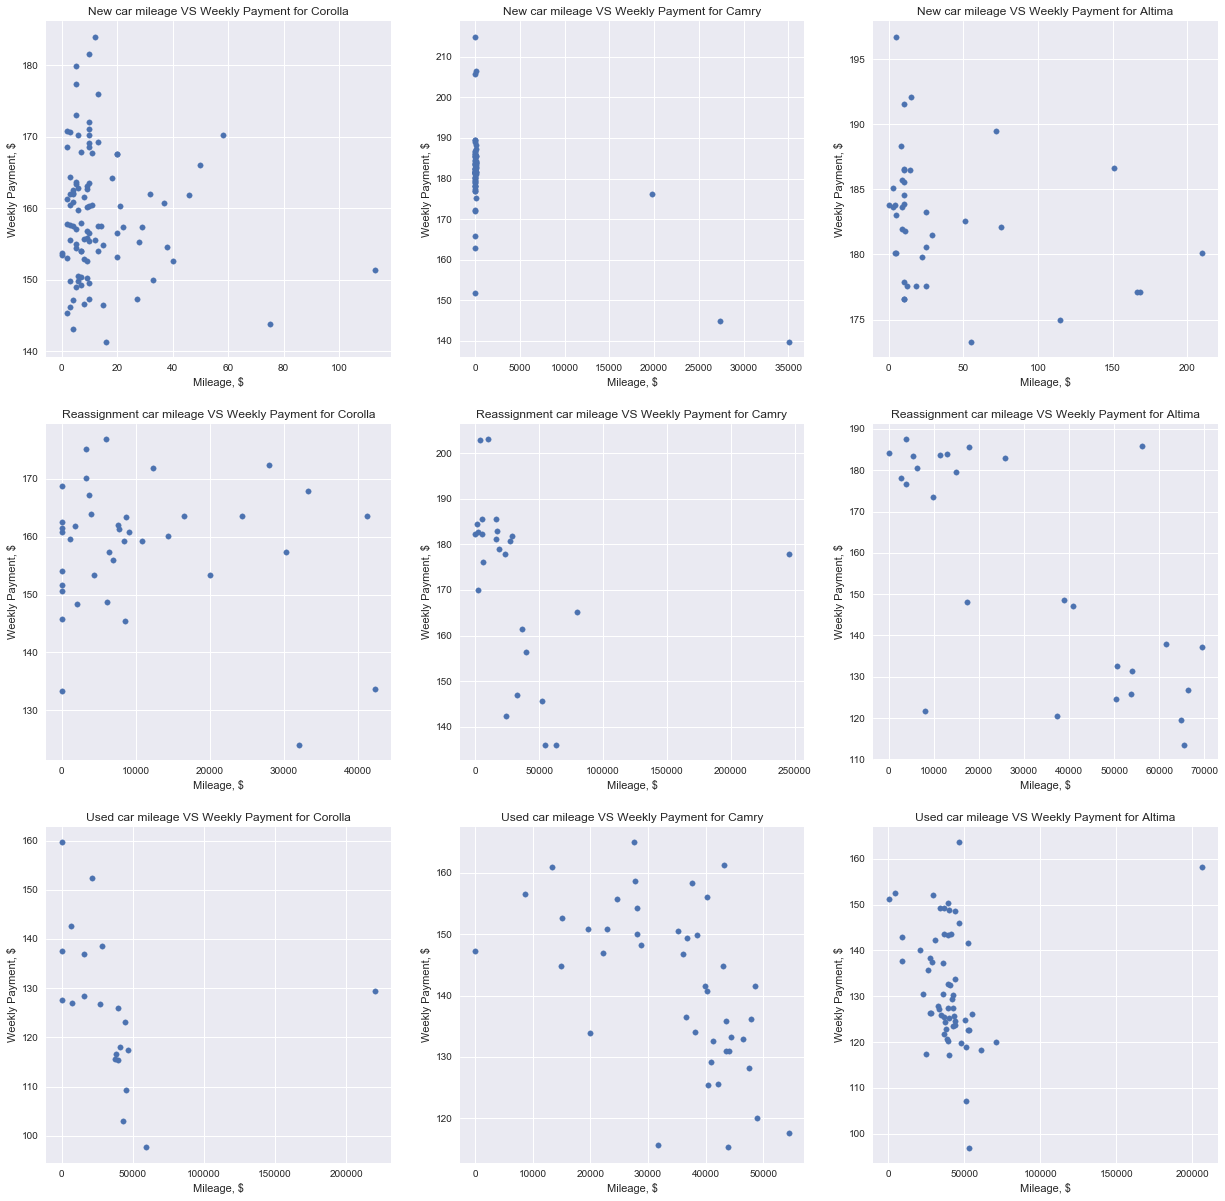

In [110]:
# I choose the model Corolla, Camry and Altima to analyze the relationship between Invoiced Amount and Weekly Payment based on new/used/reassignment.

model_example=['Corolla','Camry','Altima']
new_used=np.unique(df['New/Used'])

fig = plt.figure(figsize=(21, 21))
pltid=1

for car_con in new_used:
    df_con=df[df['New/Used']==car_con]
    for model in model_example:  
        df_model_example=df_con[df_con['Model']==model]  
        
        plt.subplot(3,3, pltid)
        plt.scatter(df_model_example['Mileage @ Inception'],df_model_example['Weekly Payment'],  s=30)
        plt.xlabel('Mileage, $')
        plt.ylabel('Weekly Payment, $')
        titlename=car_con +' car mileage VS Weekly Payment for ' + model
        plt.title(titlename)
        pltid+=1
plt.show()

#### Mileage doesn't seem to be an important factor to decide the weekly payment for new and assignment car, but is an important factor to decide the used car.

### 3.6 Model Year and Weekly Payment 

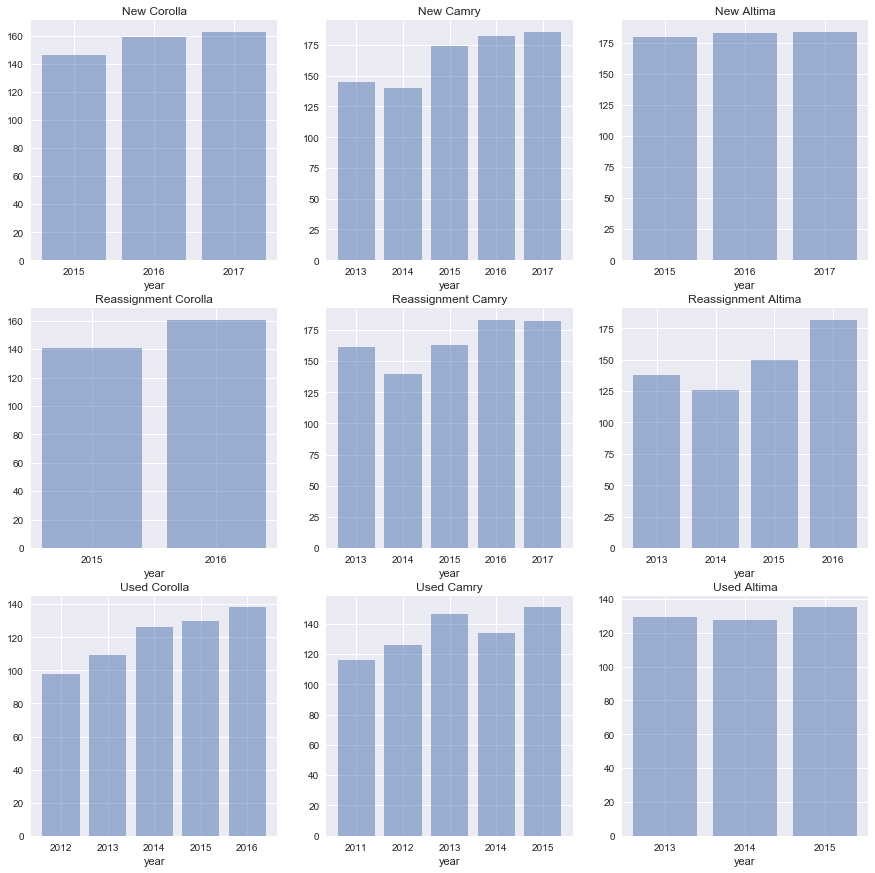

In [112]:
model_example=['Corolla','Camry','Altima']
new_used=np.unique(df['New/Used'])
fig = plt.figure(figsize=(15, 15))
pltid=1
for car_con in new_used:
    df_con=df[df['New/Used']==car_con]
    for model in model_example:
        df_model_example=df_con[df_con['Model']==model]
        df_model_con=df_model_example['Weekly Payment'].groupby(df['Year']).mean()
        df_model_con=pd.DataFrame(df_model_con)
    
        x_pos = np.arange(len(df_model_con['Weekly Payment']))
        
        plt.subplot(3,3, pltid)
        plt.bar(x_pos, df_model_con['Weekly Payment'], align='center', alpha=0.5)
        plt.xticks(x_pos, df_model_con['Weekly Payment'].index)
        plt.xlabel('year')
        titlename=car_con + ' '+ model
        plt.title(titlename)
        pltid+=1


### 3.7 Fleet size in 2015 and 2016 

In [113]:
df['BuyYear'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M').dt.strftime("%Y")
df['Month'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %H:%M').dt.strftime("%m")

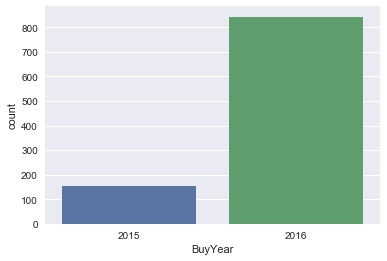

In [190]:
sns.countplot(x='BuyYear',data=df)

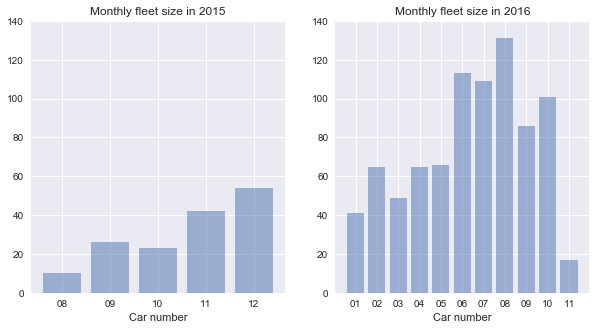

In [114]:
df['Datetime']=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M')
df['Month']=df['Datetime'].dt.strftime("%m")
df['BuyYear']=df['Datetime'].dt.strftime("%Y")

year_all=np.unique(df['BuyYear'])
fig = plt.figure(figsize=(10, 5))
pltid=1
for year in year_all:
    df_year=df[df['BuyYear']==year]
    df_year_month=df_year.groupby(['Month']).agg(['mean', 'count'])
    df_year_month_pay=df_year_month['Weekly Payment']
    plt.subplot(1,2, pltid)
    plt.ylim([0,140])
    y_pos = np.arange(len(df_year_month_pay))
    plt.bar(y_pos, df_year_month_pay['count'], align='center', alpha=0.5)
    plt.xticks(y_pos, df_year_month_pay.index)
    plt.xlabel('Month')
    plt.xlabel('Car number')
    titlename='Monthly fleet size in ' + year
    plt.title(titlename)
    pltid+=1
plt.show()

#### Xchange Leasing program lunched in 2015, and start expanding dramatically since then.

#### Car rental and equipment rental are seasonal businesses, with decreased levels of business in the winter months and heightened activity during the spring and summer. To better meet the market demand, we should have the ability to dynamically manage fleet capacity, since car purchasing is the significant portion of our cost structure.

### 3.8  State Fleet Size

In [115]:
state_count=df_zip.groupby(['State'], sort=True).agg(['count'])
state_count['Date']

,count
State,
CA,71
DC,4
GA,2
IL,1
PA,7
TN,3
TX,11
WA,7


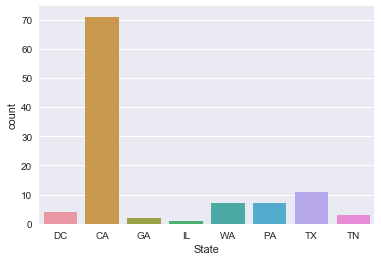

In [116]:
sns.countplot(x = 'State', data = df_zip)

#### Most cars were purchased in CA and are using in CA.

# 5. Findings


#### 1.	Most cars were purchased from Toyota and Nissan.
#### 2.	The top 4 models that UBER are holding: Corolla, Camry, Altima, Sentra
#### 3.	Most cars are new, most new and used cars were purchased from Toyota.
#### 4.	There are some positive relationship between invoiced amount and weekly payment for new Corolla, used Corolla and used Camry
#### 5.	Mileage is an important factor to decide the weekly payment for used car.
#### 6.	Car rental and equipment rental are seasonal businesses.
#### 7.	Most cars were purchased in CA.
